In [11]:
import pandas as pd
import matplotlib.pyplot as plt

In [12]:
#read the CSV file into a dataframe. 
df= pd.read_csv('pG_picked_protein_group_no_remap.csv')

#select the column you want to keep
columns_to_keep = ['Protein IDs', 'Q-value']
new_df= df[columns_to_keep]
print(new_df)

#print(new_df)
new_df.to_csv('ProteinIDs_picked_protein_group_no_remap.csv', index= False)

                                             Protein IDs   Q-value
0                                   sp|P35527|K1C9_HUMAN  0.000316
1                                   sp|P35908|K22E_HUMAN  0.000316
2            sp|P67809|YBOX1_HUMAN;sp|Q9Y2T7|YBOX2_HUMAN  0.000316
3            sp|P09972|ALDOC_HUMAN;sp|P05062|ALDOB_HUMAN  0.000316
4      sp|P14550|AK1A1_HUMAN;sp|Q96JD6-4|AKCL2_HUMAN;...  0.000316
...                                                  ...       ...
38912                           pI|c17riboseqorf81_HUMAN  0.808952
38913                           sR|single_ribo1703_HUMAN  0.808952
38914                            sp|Q8N682-2|DRAM1_HUMAN  0.808952
38915                             REV__pI|c18riboseqorf7  0.808960
38916                            sp|Q96HC4-5|PDLI5_HUMAN  0.808960

[38917 rows x 2 columns]


In [13]:
df = pd.read_csv('ProteinIDs_picked_protein_group_no_remap.csv')

# Split the column by '|', but only keep the first two splits if there are more than 2
split_col = df['Protein IDs'].str.split('|', n=2, expand=True)

# Rename the new columns
split_col.columns = ['Protein Type', 'Protein Uniprot', 'Protein Label']

# Concatenate the original DataFrame and the new columns
new_df = pd.concat([df['Q-value'], split_col], axis=1)
print(new_df)
new_df.to_csv('SeparateProteinIDs_picked_protein_group_no_remap.csv')

        Q-value Protein Type        Protein Uniprot  \
0      0.000316           sp                 P35527   
1      0.000316           sp                 P35908   
2      0.000316           sp                 P67809   
3      0.000316           sp                 P09972   
4      0.000316           sp                 P14550   
...         ...          ...                    ...   
38912  0.808952           pI  c17riboseqorf81_HUMAN   
38913  0.808952           sR  single_ribo1703_HUMAN   
38914  0.808952           sp               Q8N682-2   
38915  0.808960      REV__pI         c18riboseqorf7   
38916  0.808960           sp               Q96HC4-5   

                                           Protein Label  
0                                             K1C9_HUMAN  
1                                             K22E_HUMAN  
2                      YBOX1_HUMAN;sp|Q9Y2T7|YBOX2_HUMAN  
3                      ALDOC_HUMAN;sp|P05062|ALDOB_HUMAN  
4      AK1A1_HUMAN;sp|Q96JD6-4|AKCL2_HUMAN;s

sp         15303
REV__sp    12704
REV__sR     2725
sR          2701
REV__pI     2130
pI          2125
sU           444
REV__sU      428
nC           189
REV__nC      168
Name: Protein Type, dtype: int64


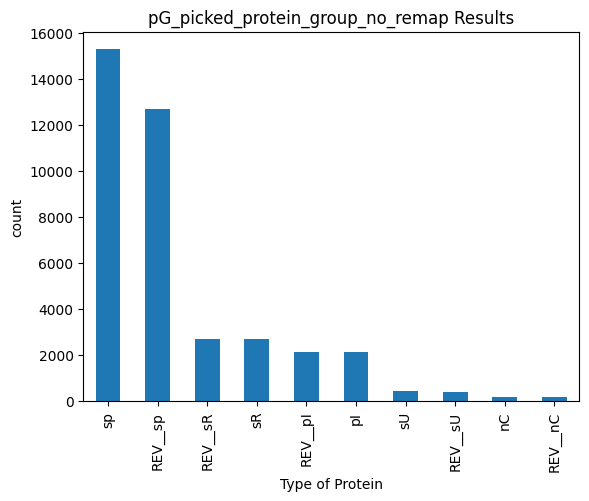

In [14]:
# Load the CSV file into a pandas DataFrame
df = pd.read_csv('SeparateProteinIDs_picked_protein_group_no_remap.csv')

# Count the number of occurrences of each unique string in the 'Column 1' column
value_counts = df['Protein Type'].value_counts()

# Print the value counts
print(value_counts)

# Plot the value counts as a bar chart
value_counts.plot(kind='bar')
plt.title('pG_picked_protein_group_no_remap Results')
plt.xlabel('Type of Protein')
plt.ylabel('count')
plt.show()
          

Protein Type
REV__pI       2
REV__sR       1
REV__sp      58
sR            1
sp         6159
Name: Protein Type, dtype: int64


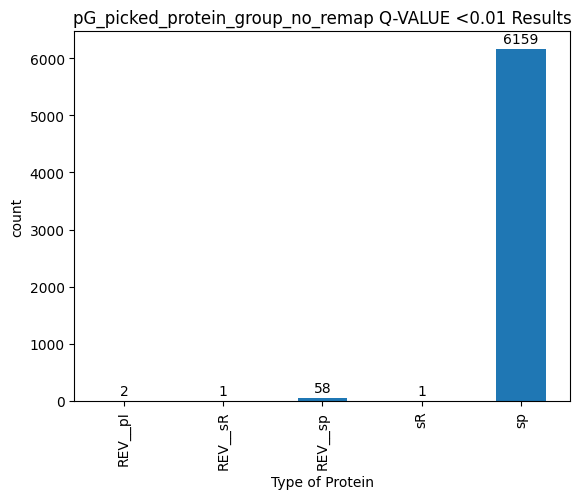

In [26]:
df = pd.read_csv('SeparateProteinIDs_picked_protein_group_no_remap.csv')

# filter for Q-value < 0.01
df_filtered = df[df['Q-value'] < 0.01]

# group by protein type and count the number of each type
protein_count = df_filtered.groupby('Protein Type')['Protein Type'].count()

# print the protein count
print(protein_count)

# Plot the value counts as a bar chart
protein_count.plot(kind='bar')
plt.title('pG_picked_protein_group_no_remap Q-VALUE <0.01 Results')
plt.xlabel('Type of Protein')
plt.ylabel('count')
# add labels to the bars
for i, count in enumerate(protein_count):
    plt.text(i, count + 50, str(count), ha='center', va='bottom')

plt.show()
          
          

In [16]:
# filter for Q-value >= 0.01
df_above_cutoff = df[df['Q-value'] >= 0.01]

# group by protein type and count the number of each type above the Q-value cutoff
protein_count_above = df_above_cutoff.groupby('Protein Type')['Protein Type'].count()

# print the protein counts
print("Protein count below Q-value cutoff:")
print(protein_count)
print("\nProtein count above Q-value cutoff:")
print(protein_count_above)

Protein count below Q-value cutoff:
Protein Type
REV__pI       2
REV__sR       1
REV__sp      58
sR            1
sp         6159
Name: Protein Type, dtype: int64

Protein count above Q-value cutoff:
Protein Type
REV__nC      168
REV__pI     2128
REV__sR     2724
REV__sU      428
REV__sp    12646
nC           189
pI          2125
sR          2700
sU           444
sp          9144
Name: Protein Type, dtype: int64


# Q-value filter CutOFF <0.01

/var/folders/bt/n98c3tq15s3d6866b0l_z_400000gn/T/ipykernel_28055/392092275.py:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_below_cutoff['Protein Type'] = df_below_cutoff['Protein Type'].replace(['REV__pI', 'REV__sR','REV__nC', 'REV__sU', 'pI', 'sR', 'nC','sU'], 'Microprotein')
/var/folders/bt/n98c3tq15s3d6866b0l_z_400000gn/T/ipykernel_28055/392092275.py:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_below_cutoff['Protein Type'] = df_below_cutoff['Protein Type'].replace(['sp', 'REV__sp'], 'sp')


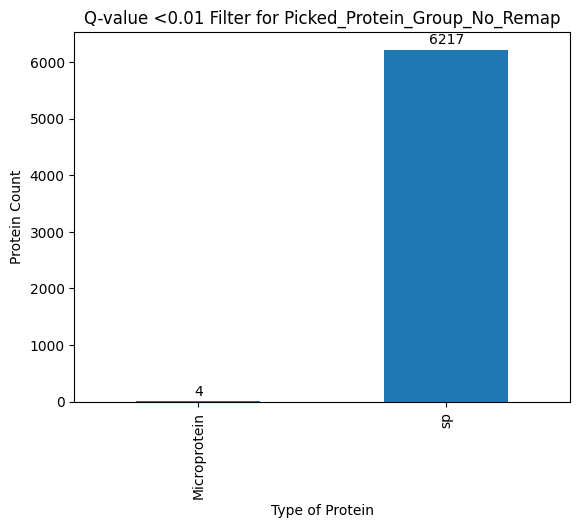

In [24]:
# read in the CSV file with the separated protein IDs
df = pd.read_csv('SeparateProteinIDs_picked_protein_group_no_remap.csv')

# filter for Q-value < 0.01
df_below_cutoff = df[df['Q-value'] < 0.01]

# combine counts for REV__pI, REV__sR, REV__nC, REV__sU, pI, sR, nC, sU as 'microproteins'
df_below_cutoff['Protein Type'] = df_below_cutoff['Protein Type'].replace(['REV__pI', 'REV__sR','REV__nC', 'REV__sU', 'pI', 'sR', 'nC','sU'], 'Microprotein')

# combine counts for sp and REV__sp as 'sp'
df_below_cutoff['Protein Type'] = df_below_cutoff['Protein Type'].replace(['sp', 'REV__sp'], 'sp')

# group by protein type and count the number of each type below the Q-value cutoff
protein_count_below = df_below_cutoff.groupby('Protein Type')['Protein Type'].count()

# plot the histogram
protein_count_below.plot(kind='bar')
plt.title('Q-value <0.01 Filter for Picked_Protein_Group_No_Remap')
plt.xlabel('Type of Protein')
plt.ylabel('Protein Count')
# add labels to the bars
for i, count in enumerate(protein_count_below):
    plt.text(i, count + 50, str(count), ha='center', va='bottom')

plt.show()

# No Q-value filter

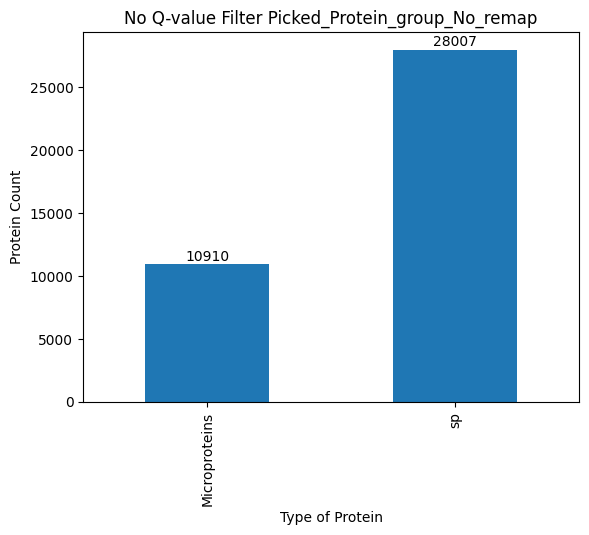

In [25]:
# read in the CSV file with the separated protein IDs
df = pd.read_csv('SeparateProteinIDs_picked_protein_group_no_remap.csv')

# combine counts for REV__pI, REV__sR, REV__nC, REV__sU, pI, sR, nC, sU as 'microproteins'
df['Protein Type'] = df['Protein Type'].replace(['REV__pI', 'REV__sR', 'REV__nC', 'REV__sU', 'pI', 'sR', 'nC', 'sU'], 'Microproteins')

# combine counts for sp and REV__sp as 'sp'
df['Protein Type'] = df['Protein Type'].replace(['sp', 'REV__sp'], 'sp')

# group by protein type and count the number of each type
protein_count = df.groupby('Protein Type')['Protein Type'].count()

# plot the histogram
protein_count.plot(kind='bar')
plt.title('No Q-value Filter Picked_Protein_group_No_remap')
plt.xlabel('Type of Protein')
plt.ylabel('Protein Count')

# add labels to the bars
for i, count in enumerate(protein_count):
    plt.text(i, count + 50, str(count), ha='center', va='bottom')

plt.show()